<a href="https://colab.research.google.com/github/dgalian/FTW_B7/blob/main/ML/Forest%20Cover%20Type%20Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Forest Cover Type Prediction





*   Predict the forest cover type (the predominant kind of tree cover) from strictly cartographic variables (as opposed to remotely sensed data). The actual forest cover type for a given 30 x 30 meter cell was determined from US Forest Service (USFS) Region 2 Resource Information System data. Independent variables were then derived from data obtained from the US Geological Survey and USFS. The data is in raw form (not scaled) and contains binary columns of data for qualitative independent variables such as wilderness areas and soil type.

*   This study area includes four wilderness areas located in the Roosevelt National Forest of northern Colorado. These areas represent forests with minimal human-caused disturbances, so that existing forest cover types are more a result of ecological processes rather than forest management practices.

# Dataset Description

The study area includes four wilderness areas located in the Roosevelt National Forest of northern Colorado. Each observation is a 30m x 30m patch. You are asked to predict an integer classification for the forest cover type. The seven types are:

1 - Spruce/Fir

2- Lodgepole Pine

3 - Ponderosa Pine

4 - Cottonwood/Willow

5 - Aspen

6 - Douglas-fir

7 - Krummholz

The training set (15120 observations) contains both features and the Cover_Type. The test set contains only the features. You must predict the Cover_Type for every row in the test set (565892 observations).

# Data Fields

**Elevation** - Elevation in meters

**Aspect** - Aspect in degrees azimuth

**Slope** - Slope in degrees

**Horizontal_Distance_To_Hydrology** - Horz Dist to nearest surface water features

**Vertical_Distance_To_Hydrology** - Vert Dist to nearest surface water features

**Horizontal_Distance_To_Roadways** - Horz Dist to nearest roadway

**Hillshade_9am (0 to 255 index)** - Hillshade index at 9am, summer solstice

**Hillshade_Noon (0 to 255 index)** - Hillshade index at noon, summer solstice

**Hillshade_3pm (0 to 255 index)** - Hillshade index at 3pm, summer solstice

**Horizontal_Distance_To_Fire_Points** - Horz Dist to nearest wildfire ignition points

**Wilderness_Area (4 binary columns, 0 = absence or 1 = presence)** - Wilderness area designation

**Soil_Type (40 binary columns, 0 = absence or 1 = presence)** - Soil Type designation

**Cover_Type (7 types, integers 1 to 7)** - Forest Cover Type designation

# Data Preparation

In [ ]:
import pandas as pd
import numpy as np

# visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
train = pd.read_csv('https://raw.githubusercontent.com/angelaaaateng/ftw_python/main/data/covertype_train.csv',index_col=0)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15120 entries, 1 to 15120
Data columns (total 55 columns):
 #   Column                              Non-Null Count  Dtype
---  ------                              --------------  -----
 0   Elevation                           15120 non-null  int64
 1   Aspect                              15120 non-null  int64
 2   Slope                               15120 non-null  int64
 3   Horizontal_Distance_To_Hydrology    15120 non-null  int64
 4   Vertical_Distance_To_Hydrology      15120 non-null  int64
 5   Horizontal_Distance_To_Roadways     15120 non-null  int64
 6   Hillshade_9am                       15120 non-null  int64
 7   Hillshade_Noon                      15120 non-null  int64
 8   Hillshade_3pm                       15120 non-null  int64
 9   Horizontal_Distance_To_Fire_Points  15120 non-null  int64
 10  Wilderness_Area1                    15120 non-null  int64
 11  Wilderness_Area2                    15120 non-null  int64
 12  Wild

In [ ]:
train.head()

Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
Id                                                               
1        2596      51      3                               258   
2        2590      56      2                               212   
3        2804     139      9                               268   
4        2785     155     18                               242   
5        2595      45      2                               153   

    Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
Id                                                                    
1                                0                              510   
2                               -6                              390   
3                               65                             3180   
4                              118                             3090   
5                               -1                              391   

    Hillshade_9am  Hillshade_Noon  Hillshade_3pm  \
Id                                                 
1             221             232            148   
2             220             235            151   
3             234             238            135   
4             238             238            122   
5             220             234            150   

    Horizontal_Distance_To_Fire_Points  ...  Soil_Type32  Soil_Type33  \
Id                                      ...                             
1                                 6279  ...            0            0   
2                                 6225  ...            0            0   
3                                 6121  ...            0            0   
4                                 6211  ...            0            0   
5                                 6172  ...            0            0   

    Soil_Type34  Soil_Type35  Soil_Type36  Soil_Type37  Soil_Type38  \
Id                                                                    
1             0            0            0            0            0   
2             0            0            0            0            0   
3             0            0            0            0            0   
4             0            0            0            0            0   
5             0            0            0            0            0   

    Soil_Type39  Soil_Type40  Cover_Type  
Id                                        
1             0            0           5  
2             0            0           5  
3             0            0           2  
4             0            0           2  
5             0            0           5  

[5 rows x 55 columns]

In [ ]:
train.describe()

Elevation        Aspect         Slope  \
count  15120.000000  15120.000000  15120.000000   
mean    2749.322553    156.676653     16.501587   
std      417.678187    110.085801      8.453927   
min     1863.000000      0.000000      0.000000   
25%     2376.000000     65.000000     10.000000   
50%     2752.000000    126.000000     15.000000   
75%     3104.000000    261.000000     22.000000   
max     3849.000000    360.000000     52.000000   

       Horizontal_Distance_To_Hydrology  Vertical_Distance_To_Hydrology  \
count                      15120.000000                    15120.000000   
mean                         227.195701                       51.076521   
std                          210.075296                       61.239406   
min                            0.000000                     -146.000000   
25%                           67.000000                        5.000000   
50%                          180.000000                       32.000000   
75%                          330.000000                       79.000000   
max                         1343.000000                      554.000000   

       Horizontal_Distance_To_Roadways  Hillshade_9am  Hillshade_Noon  \
count                     15120.000000   15120.000000    15120.000000   
mean                       1714.023214     212.704299      218.965608   
std                        1325.066358      30.561287       22.801966   
min                           0.000000       0.000000       99.000000   
25%                         764.000000     196.000000      207.000000   
50%                        1316.000000     220.000000      223.000000   
75%                        2270.000000     235.000000      235.000000   
max                        6890.000000     254.000000      254.000000   

       Hillshade_3pm  Horizontal_Distance_To_Fire_Points  ...   Soil_Type32  \
count   15120.000000                        15120.000000  ...  15120.000000   
mean      135.091997                         1511.147288  ...      0.045635   
std        45.895189                         1099.936493  ...      0.208699   
min         0.000000                            0.000000  ...      0.000000   
25%       106.000000                          730.000000  ...      0.000000   
50%       138.000000                         1256.000000  ...      0.000000   
75%       167.000000                         1988.250000  ...      0.000000   
max       248.000000                         6993.000000  ...      1.000000   

        Soil_Type33   Soil_Type34   Soil_Type35   Soil_Type36   Soil_Type37  \
count  15120.000000  15120.000000  15120.000000  15120.000000  15120.000000   
mean       0.040741      0.001455      0.006746      0.000661      0.002249   
std        0.197696      0.038118      0.081859      0.025710      0.047368   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

        Soil_Type38   Soil_Type39   Soil_Type40    Cover_Type  
count  15120.000000  15120.000000  15120.000000  15120.000000  
mean       0.048148      0.043452      0.030357      4.000000  
std        0.214086      0.203880      0.171574      2.000066  
min        0.000000      0.000000      0.000000      1.000000  
25%        0.000000      0.000000      0.000000      2.000000  
50%        0.000000      0.000000      0.000000      4.000000  
75%        0.000000      0.000000      0.000000      6.000000  
max        1.000000      1.000000      1.000000      7.000000  

[8 rows x 55 columns]

In [ ]:
# Checking the distribution of Cover Types
train['Cover_Type'].value_counts()

5    2160
2    2160
1    2160
7    2160
3    2160
6    2160
4    2160
Name: Cover_Type, dtype: int64

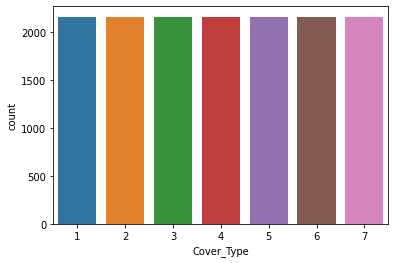

In [ ]:
sns.countplot(x='Cover_Type', data=train, palette='tab10')

There is an equal distribution of Cover Type in the dataset. We will now proceed to exploring the features. 

# Exploratory Data Analysis

**Grouping the features**

In [ ]:
# Grouping together the numeric and categorical features
num_feats = train.iloc[:,0:10]
cat_feats = train.iloc[:,10:-1]

In [ ]:
# Just checking if I grouped them correctly
print(num_feats.shape, num_feats.columns)
print(cat_feats.shape, cat_feats.columns)

(15120, 10) Index(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points'],
      dtype='object')
(15120, 44) Index(['Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3',
       'Wilderness_Area4', 'Soil_Type1', 'Soil_Type2', 'Soil_Type3',
       'Soil_Type4', 'Soil_Type5', 'Soil_Type6', 'Soil_Type7', 'Soil_Type8',
       'Soil_Type9', 'Soil_Type10', 'Soil_Type11', 'Soil_Type12',
       'Soil_Type13', 'Soil_Type14', 'Soil_Type15', 'Soil_Type16',
       'Soil_Type17', 'Soil_Type18', 'Soil_Type19', 'Soil_Type20',
       'Soil_Type21', 'Soil_Type22', 'Soil_Type23', 'Soil_Type24',
       'Soil_Type25', 'Soil_Type26', 'Soil_Type27', 'Soil_Type28',
       'Soil_Type29', 'Soil_Type30', 'Soil_Type31', 'Soil_Type32',
       'Soil_Type33', 'Soil_Type34', 'Soil_Type35', 'Soil_Type36',
       'Soil_Type

In [ ]:
# Initializing plot size and font size (huhu malabo mata ko i'm so sorry)
plt.rcParams["figure.figsize"] = (10,6)
plt.rcParams['font.size'] = 12

**Exploring the correlation between Numeric Features**

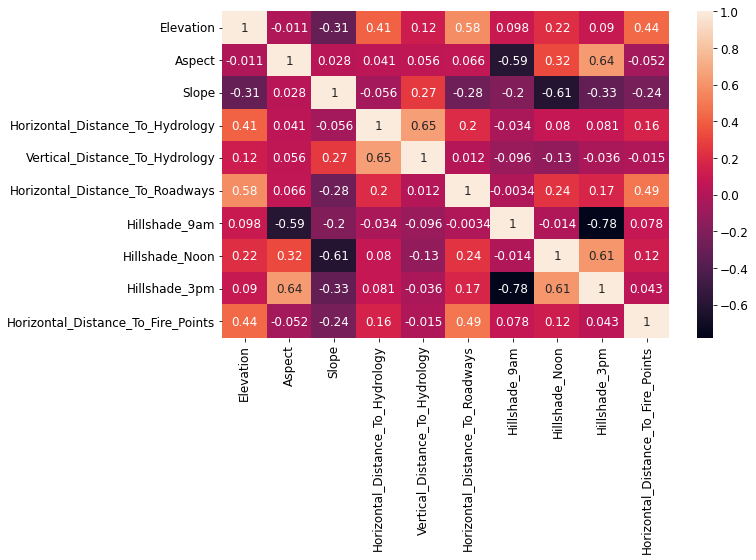

In [ ]:
# Checking correlation between the numeric features
sns.heatmap(num_feats.corr(), annot=True)

There tends to be a **positive correlation** between the following features:
*   Horizantal Distance to Hydrology and Vertical Distance to Hydrology
*   Hillshade 3pm and Aspect
*   Horizontal Distance to Roadways and Elevation

Meanwhile, there tends to be a **negative correlation** between the following features:
*   Hillshade noon and Slope
*   Hillshade 9am and Aspect







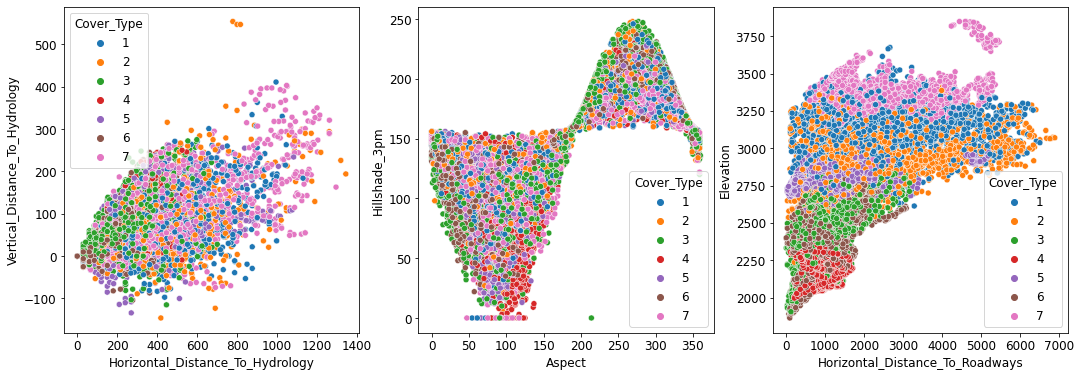

In [ ]:
fig, axs = plt.subplots(1,3, figsize=(18,6))

sns.scatterplot(ax=axs[0], x='Horizontal_Distance_To_Hydrology', y='Vertical_Distance_To_Hydrology', data = train, hue = 'Cover_Type', palette='tab10')
sns.scatterplot(ax=axs[1], x='Aspect', y='Hillshade_3pm', data = train, hue = 'Cover_Type', palette='tab10')
sns.scatterplot(ax=axs[2], x='Horizontal_Distance_To_Roadways', y='Elevation',data = train, hue = 'Cover_Type', palette='tab10')

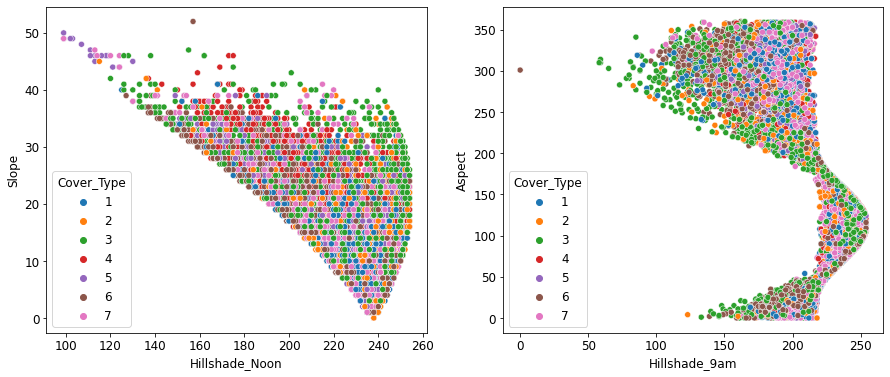

In [ ]:
fig, axs = plt.subplots(1,2, figsize=(15,6))

sns.scatterplot(ax=axs[0], x='Hillshade_Noon', y='Slope', data = train, hue = 'Cover_Type', palette='tab10')
sns.scatterplot(ax=axs[1], y='Aspect', x='Hillshade_9am', data = train, hue = 'Cover_Type', palette='tab10')

**Exploring the Categorical Features**

In [ ]:
# Converting the categorical features for EDA
# Combining the values of the 4 Wilderness Areas and 40  Soil Types into new columns- Wilderness Areas and Soil Types, respectively
train['Wilderness_Areas'] = (train.iloc[:,10:15] == 1).idxmax(1)
train['Soil_Types'] = (train.iloc[:,15:55] == 1).idxmax(1)

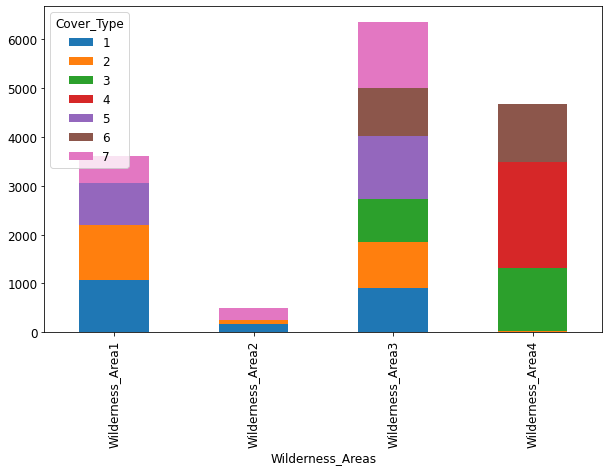

In [ ]:
# Checking the Wilderness Areas
wild_areas_eda = train.groupby(['Cover_Type','Wilderness_Areas']).size().reset_index().pivot(index='Wilderness_Areas',columns='Cover_Type', values=0)
wild_areas_eda.plot(kind='bar', stacked=True)

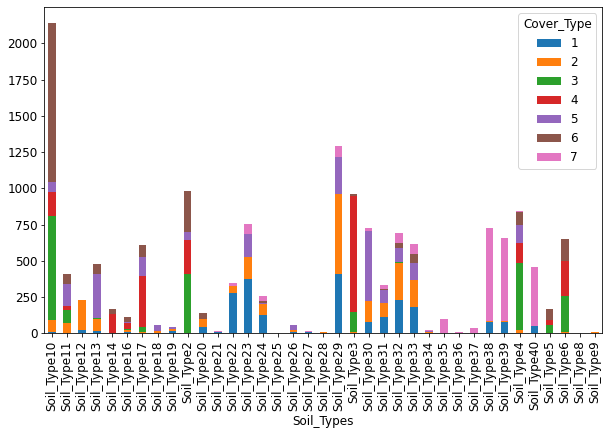

In [ ]:
# Checking the Soil Types
soil_type_eda = train.groupby(['Cover_Type','Soil_Types']).size().reset_index().pivot(index='Soil_Types',columns='Cover_Type', values=0)
soil_type_eda.plot(kind='bar', stacked=True)

**Exploring both Numeric and Categorical Features**

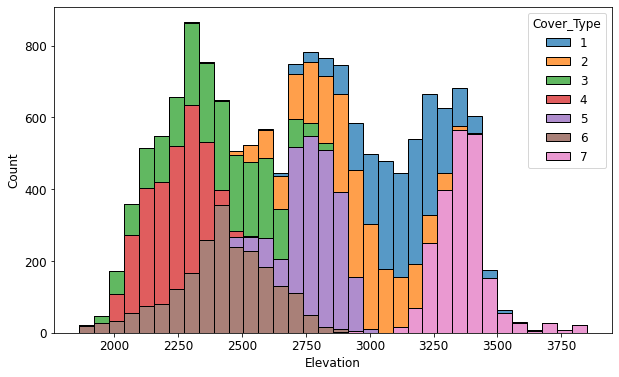

In [ ]:
# Checking the trend of Elevation and Cover Type
sns.histplot(x='Elevation',data=train,hue='Cover_Type',multiple='stack',palette='tab10')

Cover Type 3, 4, and 6 tend to have lower elevation while Cover Type 1, 2, 5, 7 tend to have higher elevation.


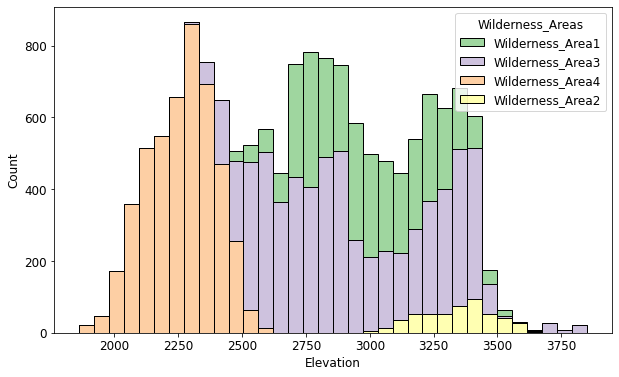

In [ ]:
# Checking the trend of Elevation and Wilderness Area
sns.histplot(x='Elevation',data=train,hue='Wilderness_Areas',multiple='stack',palette='Accent')

Wilderness Area 4 tends to have lower elevation compared to the other wilderness areas.

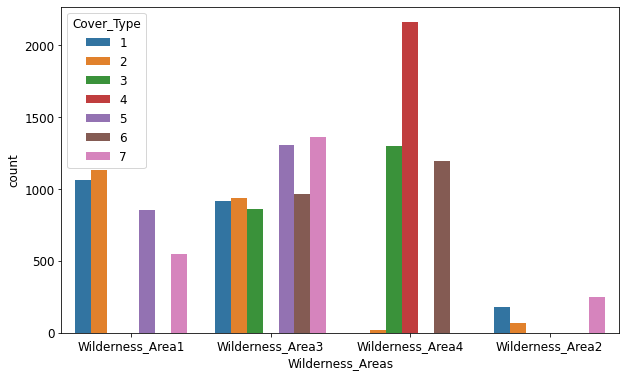

In [ ]:
# Checking Wilderness Area and Cover Type
sns.countplot(x='Wilderness_Areas', data=train, hue='Cover_Type',palette='tab10')

Wilderness Area 4 is composed mostly of Cover Types 3, 4, and 6 -- consistent with our earlier observations regarding the trend of Cover Types by Elevation and the trend of Wilderness Area by Elevation.

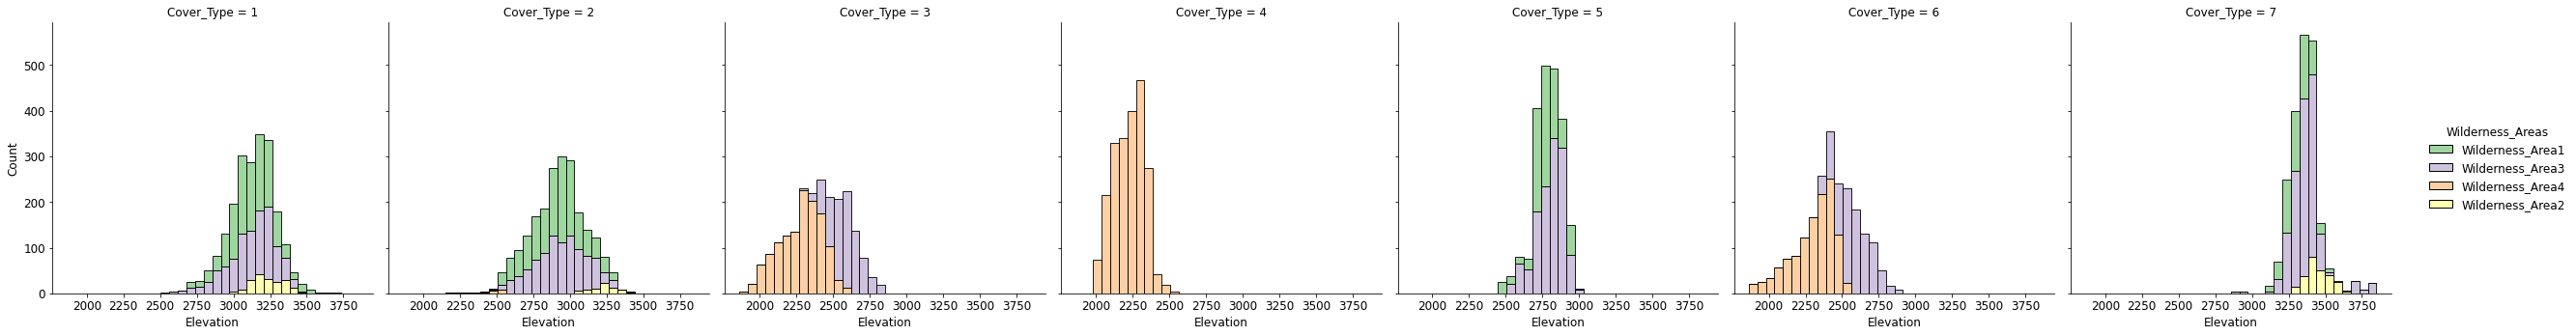

In [ ]:
# Comparing the trend of elevation and wilderness area of each Cover Type
sns.displot(x='Elevation', data=train, hue='Wilderness_Areas', multiple='stack', col='Cover_Type', palette='Accent')

# Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = train.drop(['Cover_Type','Wilderness_Areas','Soil_Types'], axis=1)
print(X.shape, np.array(X.columns))

(15120, 54) ['Elevation' 'Aspect' 'Slope' 'Horizontal_Distance_To_Hydrology'
 'Vertical_Distance_To_Hydrology' 'Horizontal_Distance_To_Roadways'
 'Hillshade_9am' 'Hillshade_Noon' 'Hillshade_3pm'
 'Horizontal_Distance_To_Fire_Points' 'Wilderness_Area1'
 'Wilderness_Area2' 'Wilderness_Area3' 'Wilderness_Area4' 'Soil_Type1'
 'Soil_Type2' 'Soil_Type3' 'Soil_Type4' 'Soil_Type5' 'Soil_Type6'
 'Soil_Type7' 'Soil_Type8' 'Soil_Type9' 'Soil_Type10' 'Soil_Type11'
 'Soil_Type12' 'Soil_Type13' 'Soil_Type14' 'Soil_Type15' 'Soil_Type16'
 'Soil_Type17' 'Soil_Type18' 'Soil_Type19' 'Soil_Type20' 'Soil_Type21'
 'Soil_Type22' 'Soil_Type23' 'Soil_Type24' 'Soil_Type25' 'Soil_Type26'
 'Soil_Type27' 'Soil_Type28' 'Soil_Type29' 'Soil_Type30' 'Soil_Type31'
 'Soil_Type32' 'Soil_Type33' 'Soil_Type34' 'Soil_Type35' 'Soil_Type36'
 'Soil_Type37' 'Soil_Type38' 'Soil_Type39' 'Soil_Type40']


In [ ]:
y = train['Cover_Type']
print(len(y), y.head())

15120 Id
1    5
2    5
3    2
4    2
5    5
Name: Cover_Type, dtype: int64


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# Training a Decision Tree Model

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

# Predictions and Evaluation of Decision Tree

In [ ]:
dtree_pred = dtree.predict(X_test)
dtree_pred

array([3, 6, 1, ..., 4, 1, 7])

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test,dtree_pred))

              precision    recall  f1-score   support

           1       0.63      0.67      0.65       620
           2       0.64      0.58      0.61       658
           3       0.74      0.73      0.73       645
           4       0.91      0.93      0.92       661
           5       0.83      0.86      0.84       650
           6       0.78      0.78      0.78       650
           7       0.91      0.91      0.91       652

    accuracy                           0.78      4536
   macro avg       0.78      0.78      0.78      4536
weighted avg       0.78      0.78      0.78      4536



In [ ]:
print(confusion_matrix(y_test,dtree_pred))

[[415 134   3   0  17   4  47]
 [173 380  17   0  66  13   9]
 [  0  12 469  43  13 108   0]
 [  0   0  34 613   0  14   0]
 [ 12  54  20   0 556   8   0]
 [  6  11  92  19  14 508   0]
 [ 54   5   2   0   0   0 591]]


In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, dtree_pred)

0.7786596119929453

**Tree Visualization**

In [ ]:
!pip install pydot
!pip install six
!pip install graphviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
features = list(X.columns)
print(np.array(features))

['Elevation' 'Aspect' 'Slope' 'Horizontal_Distance_To_Hydrology'
 'Vertical_Distance_To_Hydrology' 'Horizontal_Distance_To_Roadways'
 'Hillshade_9am' 'Hillshade_Noon' 'Hillshade_3pm'
 'Horizontal_Distance_To_Fire_Points' 'Wilderness_Area1'
 'Wilderness_Area2' 'Wilderness_Area3' 'Wilderness_Area4' 'Soil_Type1'
 'Soil_Type2' 'Soil_Type3' 'Soil_Type4' 'Soil_Type5' 'Soil_Type6'
 'Soil_Type7' 'Soil_Type8' 'Soil_Type9' 'Soil_Type10' 'Soil_Type11'
 'Soil_Type12' 'Soil_Type13' 'Soil_Type14' 'Soil_Type15' 'Soil_Type16'
 'Soil_Type17' 'Soil_Type18' 'Soil_Type19' 'Soil_Type20' 'Soil_Type21'
 'Soil_Type22' 'Soil_Type23' 'Soil_Type24' 'Soil_Type25' 'Soil_Type26'
 'Soil_Type27' 'Soil_Type28' 'Soil_Type29' 'Soil_Type30' 'Soil_Type31'
 'Soil_Type32' 'Soil_Type33' 'Soil_Type34' 'Soil_Type35' 'Soil_Type36'
 'Soil_Type37' 'Soil_Type38' 'Soil_Type39' 'Soil_Type40']


In [ ]:
from IPython.display import Image  
from six import StringIO
# from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydot 

In [ ]:
dot_data = StringIO()  
export_graphviz(dtree, out_file=dot_data, feature_names=features,filled=True,rounded=True)
graph = pydot.graph_from_dot_data(dot_data.getvalue())  

graph

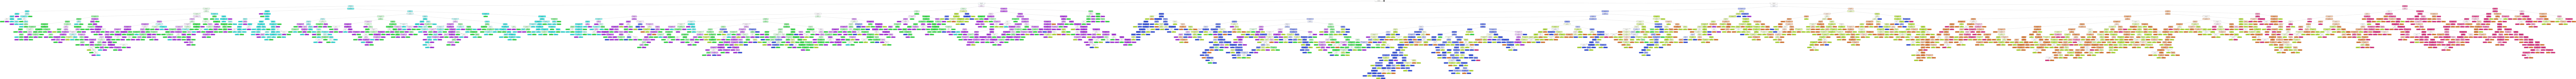

In [ ]:
Image(graph[0].create_png()) 

# Training a Random Forest Model

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_test,y_test)

RandomForestClassifier()

# Predictions and Evaluation of Random Forest

In [ ]:
rfc_pred = rfc.predict(X_test)
rfc_pred

array([6, 3, 1, ..., 4, 2, 7])

In [ ]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00       620
           2       1.00      1.00      1.00       658
           3       1.00      1.00      1.00       645
           4       1.00      1.00      1.00       661
           5       1.00      1.00      1.00       650
           6       1.00      1.00      1.00       650
           7       1.00      1.00      1.00       652

    accuracy                           1.00      4536
   macro avg       1.00      1.00      1.00      4536
weighted avg       1.00      1.00      1.00      4536



In [ ]:
print(confusion_matrix(y_test,rfc_pred))

[[620   0   0   0   0   0   0]
 [  0 658   0   0   0   0   0]
 [  0   0 645   0   0   0   0]
 [  0   0   0 661   0   0   0]
 [  0   0   0   0 650   0   0]
 [  0   0   0   0   0 650   0]
 [  0   0   0   0   0   0 652]]


In [ ]:
accuracy_score(y_test, rfc_pred)

1.0

**The Random Forest Model achieved 100% accuracy!** (legit ba to?)